# Setup

## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install

In [16]:
!pip install scattertext

     |████████████████████████████████| 7.3 MB 3.8 MB/s 
     |████████████████████████████████| 24.1 MB 61.2 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9310 sha256=bace0d1a6d897a73af608cae12934c22dff4fb21bb7dec66c6955fd844d2166e
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


## Import

In [15]:
# Importing the required libraries
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
import gensim
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from gensim.models import TfidfModel
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
import spacy
import string
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import scattertext as st
from collections import Counter
import re, io
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from pprint import pprint
from scipy.stats import rankdata, hmean, norm
import spacy
import scattertext as st
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


ModuleNotFoundError: ignored

# Read Dataset

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/chatbot-flask-simple/data/twcs.csv')

# Descriptive Statistics

## DataFrame Shape

In [13]:
print(f'DataFrame shape: {df.shape}')
rows, cols = df.shape
print(f'Rows: {rows}')
print(f'Cols: {cols}')
print(f'{df.info()}')

DataFrame shape: (2811774, 7)
Rows: 2811774
Cols: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB
None


## First 5 and Last 5 Rows

In [ ]:
pd.concat([df_sample.head(), df_sample.tail()])

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [ ]:
93 - 65

28

In [ ]:
93 - 68

25

In [ ]:
import sys
!{sys.executable} -m pip install pyLDAvis

  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached numexpr-2.7.3-cp39-cp39-win_amd64.whl (93 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached future-0.18.2-py3-none-any.whl
  Using cached funcy-1.16-py2.py3-none-any.whl (32 kB)


# Preprocessing

In [ ]:
# Store text in a variable

tweet_text = df_sample[['text']]

In [ ]:
# Let us clean the tweet text for better visualization
df_sample.drop('tweet_id', axis = 1, inplace = True)
df_sample.drop('created_at', axis = 1, inplace = True)
df_sample = df_sample[~df_sample['text'].isnull()]

In [ ]:
def preprocess(CleanText):
    CleanText = CleanText.str.replace("(<br/>)", "")
    CleanText = CleanText.str.replace('(<a).*(>).*(</a>)', '')
    CleanText = CleanText.str.replace('(&amp)', '')
    CleanText = CleanText.str.replace('(&gt)', '')
    CleanText = CleanText.str.replace('(&lt)', '')
    CleanText = CleanText.str.replace('(\xa0)', ' ')

    CleanText = CleanText.str.replace('http\S+|www.\S+', '')
    CleanText = CleanText.str.replace('@[A-Za-z0-9]+', '')

    return CleanText

df_sample['text'] = preprocess(df_sample['text'])
df_sample

<>:9: DeprecationWarning: invalid escape sequence \S
<>:9: DeprecationWarning: invalid escape sequence \S
C:\Users\Scott\AppData\Local\Temp/ipykernel_18716/2928861631.py:9: DeprecationWarning: invalid escape sequence \S
  CleanText = CleanText.str.replace('http\S+|www.\S+', '')
C:\Users\Scott\AppData\Local\Temp/ipykernel_18716/2928861631.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  CleanText = CleanText.str.replace("(<br/>)", "")
C:\Users\Scott\AppData\Local\Temp/ipykernel_18716/2928861631.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  CleanText = CleanText.str.replace('(<a).*(>).*(</a>)', '')
C:\Users\Scott\AppData\Local\Temp/ipykernel_18716/2928861631.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  CleanText = CleanText.str.replace('(&amp)', '')
C:\Users\Scott\AppData\Local\Temp/ipykernel_18716/2928861631.py:5: FutureWar

,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
0,105834,True,causing the reply to be disregarded and the t...,119236,NaN
1,ChaseSupport,False,Your business means a lot to us. Please DM yo...,NaN,119239.0
2,105835,True,I really hope you all change but I'm sure you...,119238,NaN
3,VirginTrains,False,LiveChat is online at the moment - or contac...,119241,119242.0
4,105836,True,see attached error message. I've tried leavin...,119243,119240.0
...,...,...,...,...,...
88,105859,True,I wish Amazon had an option of where I can ju...,119329,119331.0
89,105860,True,They reschedule my shit for tomorrow,119330,NaN
90,Tesco,False,"Hey Sara, sorry to hear of the issues you are...",119333,119334.0
91,105861,True,bit of both - finding the layout cumbersome a...,"119335,119336",119332.0


# Word count per Tweet

In [ ]:
df_sample['word_count'] = df_sample['text'].apply(lambda x: len(str(x).split(" ")))

In [ ]:
df_sample[['text','word_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
word_count,93.0,20.612903,6.243313,4.0,17.0,22.0,25.0,31.0


# Distribution of word counts

<AxesSubplot:>

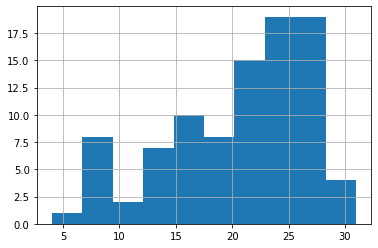

In [ ]:
# Let us take a look at distribution of words in each tweet
df_sample.text.str.split().\
    map(lambda x: len(x)).\
    hist()

# Distribution of character counts

In [ ]:
# Finding the number of characters in each tweet incuding the spaces
df_sample['char_count'] = df_sample['text'].str.len() 
df_sample[['text','char_count']].head()

,text,char_count
0,@AppleSupport causing the reply to be disregar...,109
1,@105835 Your business means a lot to us. Pleas...,141
2,@76328 I really hope you all change but I'm su...,86
3,@105836 LiveChat is online at the moment - htt...,147
4,@VirginTrains see attached error message. I've...,127


In [ ]:
[df_sample.text.str.len().describe().T]

[count     93.000000
 mean     118.107527
 std       33.290377
 min       32.000000
 25%       93.000000
 50%      132.000000
 75%      142.000000
 max      170.000000
 Name: text, dtype: float64]

<AxesSubplot:>

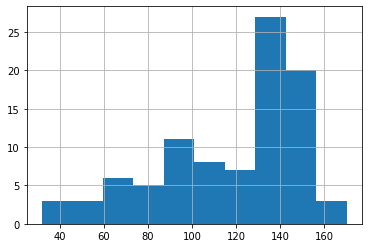

In [ ]:
# Plotting the character count for the tweets
df_sample.text.str.len().hist()

# Distribution of Stop Words

In [ ]:
# Let us take a look at the number of stopwords in the tweets
stopword = stopwords.words('english')

df_sample['stopwords'] = df_sample['text'].apply(lambda x: len([x for x in x.split() if x in stopword]))
df_sample[['text','stopwords']].head()

,text,stopwords
0,@AppleSupport causing the reply to be disregar...,8
1,@105835 Your business means a lot to us. Pleas...,6
2,@76328 I really hope you all change but I'm su...,7
3,@105836 LiveChat is online at the moment - htt...,7
4,@VirginTrains see attached error message. I've...,3


In [ ]:
df_sample[['text','stopwords']].describe().T

,count,mean,std,min,25%,50%,75%,max
stopwords,93.0,6.784946,3.243219,0.0,4.0,7.0,9.0,15.0


<AxesSubplot:>

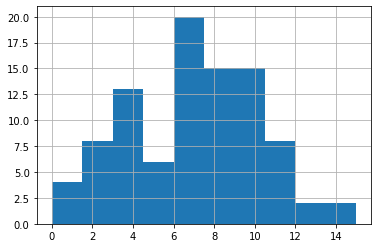

In [ ]:
# Distribution of stopwords
df_sample.text.map(lambda x: len([x for x in x.split() if x in stopword])).hist()

# Removing stopwords from the tweets

In [ ]:
# Removing stopwords and punctuations from the tweets
df_sample['text'] = df_sample['text'].str.replace('[^\w\s]','')
df_sample['text'].head()
df_sample['text'] = df_sample['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))
df_sample['text'].head()

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
C:\Users\Scott\AppData\Local\Temp/ipykernel_18716/3102544932.py:2: DeprecationWarning: invalid escape sequence \w
  df_sample['text'] = df_sample['text'].str.replace('[^\w\s]','')
C:\Users\Scott\AppData\Local\Temp/ipykernel_18716/3102544932.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sample['text'] = df_sample['text'].str.replace('[^\w\s]','')


0    AppleSupport causing reply disregarded tapped ...
1    105835 Your business means lot us Please DM na...
2    76328 I really hope change Im sure wont Becaus...
3    105836 LiveChat online moment httpstcoSY94VtU8...
4    VirginTrains see attached error message Ive tr...
Name: text, dtype: object

In [ ]:
# Let us take a look at the most frequently used word in the tweets
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(df_sample['text']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

In [ ]:
print("Word Count of tweets for each Twitter Account")
after = df_sample.groupby('author_id').apply(lambda x: x.text.apply(lambda x: len(x.split())).sum())
after[after.index.str.isdecimal() == False].sort_values(ascending=False)

Word Count of tweets for each Twitter Account


author_id
AmazonHelp        3366046
AppleSupport      2427807
Uber_Support      1083115
Tesco             1000106
SpotifyCares       956811
                   ...   
OfficeSupport        4379
CarlsJr              3544
AskDSC               3249
HotelTonightCX       2963
JackBox              2799
Length: 108, dtype: int64

In [ ]:
print("Count of tweets for each Twitter Account")
after = df_sample.groupby('author_id')['text'].count()
after[after.index.str.isdecimal() == False].sort_values(ascending=False)

Count of tweets for each Twitter Account


author_id
AmazonHelp        169840
AppleSupport      106860
Uber_Support       56270
SpotifyCares       43265
Delta              42253
                   ...  
JackBox              266
OfficeSupport        218
AskDSC               210
CarlsJr              196
HotelTonightCX       152
Name: text, Length: 108, dtype: int64

# Visualize unigrams

In [ ]:
# Defining a function to visualise n-grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

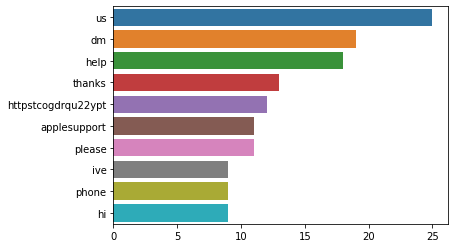

In [ ]:
# Visualizing the most frequent unigrams in the tweets
top_unigrams = get_top_ngram(df_sample['text'],1)[:10]
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x)

<AxesSubplot:>

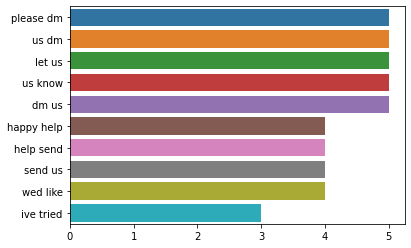

In [ ]:
# Visualising the most frequent bigrams in the tweets
top_bigrams = get_top_ngram(df_sample['text'],2)[:10]
x,y = map(list,zip(*top_bigrams))
sns.barplot(x = y,y = x)

<AxesSubplot:>

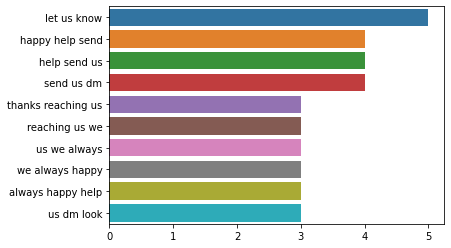

In [ ]:
# Visualising the most frequent trigrams in the tweets
top_trigrams = get_top_ngram(df_sample['text'],3)[:10]
x,y = map(list,zip(*top_trigrams))
sns.barplot(x = y,y = x)

In [ ]:
reindexed_data = df_sample['text']
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

## Function to return an integer list of predicted topic categories for the topic matrix
def get_keys(topic_matrix):
    keys = topic_matrix.argmax(axis = 1).tolist()
    return keys

## Function to return a tuple of topic categories 
def keys_to_counts(keys):
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)
    
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

## Function to return a list of n topics
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [ ]:
# Printing the most common topics 
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  dm httpstcogdrqu22ypt thanks
Topic 2:  applesupport phone 76099
Topic 3:  tried ay device
Topic 4:  currently 105857 start
Topic 5:  httpstcorsvzct982t reschedule shit
Topic 6:  tesco 25 weeks


In [ ]:
# Pre processing the tweets by performing stemming and lemmatization using nltk
def preprocess_tweets(df_sample):
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    for tweets in df_sample['text']:
        words = [w for w in word_tokenize(tweets) if (w not in stopword)]
        
        words = [lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus = preprocess_tweets(df_sample)

In [ ]:
# Creating the LDA model
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 5, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

NameError: name 'bow_corpus' is not defined

In [ ]:
#df_add = df_sample['text'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#print(type(df_add))
#print(df_add.shape)
#df_sample = df_sample.assign(text_clean=df_add)
df_inbound = df_sample[df_sample['inbound'] == True]

In [ ]:
import nlpaug.augmenter.word as naw

In [ ]:
aug = naw.BackTranslationAug(from_model_name='facebook/wmt19-en-de',
                             to_model_name='facebook/wmt19-de-en',
                             name='BackTranslationAug', device='cpu',
                             force_reload=False, verbose=0)

for index, row in df_inbound.iterrows():
    test_sentence_aug = aug.augment(row['text'])
    print(f"Original:  {row['text']}")
    print(f'Augmented: {test_sentence_aug}')
    print('------------------------------------------------')

Original:   causing the reply to be disregarded and the tapped notification under the keyboard is opened😡😡😡
Augmented: The answer is ignored and the tapped notification opens under the keyboard.
------------------------------------------------
Original:   I really hope you all change but I'm sure you won't! Because you don't have to!
Augmented: I really hope you all change, but I'm sure you won't! Because you don't have to!
------------------------------------------------
Original:   see attached error message. I've tried leaving a voicemail several times in the past week 
Augmented: see error message in the attachment. I have tried several times in the last week to leave a voicemail.
------------------------------------------------
Original:   yep, I've tried laptop too several times over the past week and again today. I've tried different browsers too
Augmented: Yes, I tried laptop several times in the last week and again today. I also tried different browsers
-----------------------